# Exploratory Data Analysis - Telco Churn Data Set

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns

In [81]:
df = pd.read_csv("Data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [83]:
#for val in df:
    #print(df[val])
    #print(df[val].unique())

In [41]:
# This function converts a dataframes column to labels and values for plotting. 

def toLabelsAndValues(dataframe,column):
    
    labels = dataframe[column].value_counts().keys().tolist()
    
    values = dataframe[column].value_counts().values.tolist()
    
    return labels, values 

toLabelsAndValues(df,'Churn')

(['No', 'Yes'], [5174, 1869])

In [84]:
#labels
lab = df["Churn"].value_counts().keys().tolist()
#values
val = df["Churn"].value_counts().values.tolist()

Churn = df[df['Churn'] == 'Yes']['Churn']
NoChurn = df[df['Churn'] == 'No']['Churn']

## Customers that have not churned vs. churned

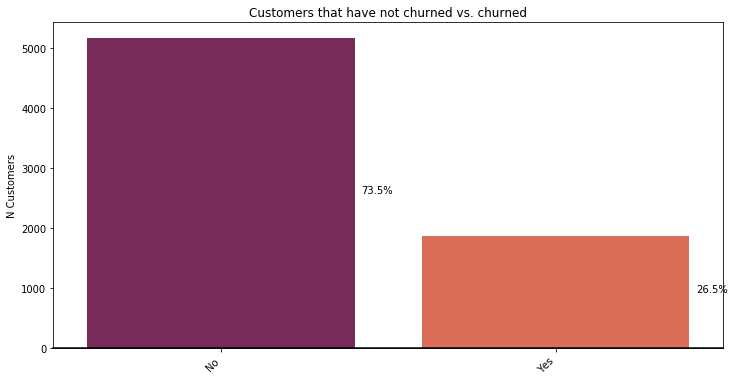

In [80]:
f,ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=lab, y=val, palette="rocket")
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Customers that have not churned vs. churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalCustomers = len(df)
total = TotalCustomers

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))


# We can see that the majority of customers did not churn. 
# 26.54 % of the customers churned. 

In [10]:
#Tenure to categorical column, we want to group customers for better visualization. 
def tenure_lab(df) :
    
    if df["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (df["tenure"] > 48) & (df["tenure"] <= 60) :
        return "Tenure_48-60"
    elif df["tenure"] > 60 :
        return "Tenure_gt_60"

In [11]:
df["tenure_group"] = df.apply(lambda df:tenure_lab(df),axis = 1)

In [12]:
print(df['tenure_group'].value_counts())

tenureGroups = df['tenure_group'].value_counts().keys().tolist()
tenureGroupsvals = df['tenure_group'].value_counts().values.tolist()

Tenure_0-12     2186
Tenure_24-48    1594
Tenure_gt_60    1407
Tenure_12-24    1024
Tenure_48-60     832
Name: tenure_group, dtype: int64


## Total amount of Months customers were subscribed to the Telco Company

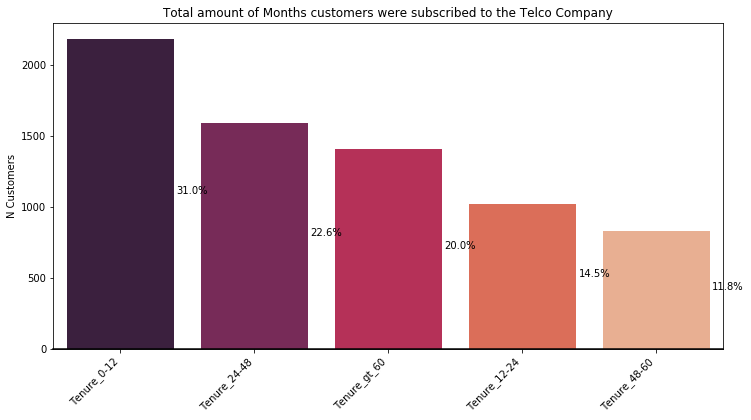

In [79]:
f,ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=tenureGroups, y=tenureGroupsvals, palette="rocket")
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Total amount of Months customers were subscribed to the Telco Company')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalCustomers = len(df)
total = TotalCustomers

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

# Most customers were subscribed 0 to 12 months. The longer the subscription time the less customers.

In [76]:
ChurnPerTenureGroup = Churn.groupby(df['tenure_group']).value_counts().values.tolist()
NoChurnPerTenureGroup = NoChurn.groupby(df['tenure_group']).value_counts().values.tolist()

## Customer Churn and no Churn per Tenure Group (in Months)

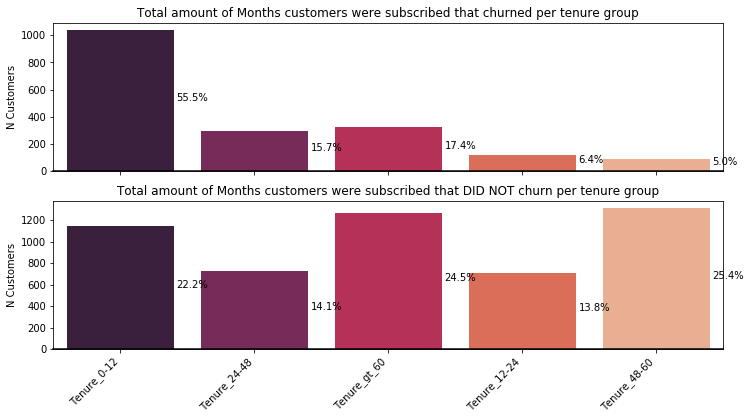

In [78]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=tenureGroups, y=ChurnPerTenureGroup, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Total amount of Months customers were subscribed that churned per tenure group')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerTenureGroup = ChurnPerTenureGroup[0] + ChurnPerTenureGroup[1] + ChurnPerTenureGroup[2] + ChurnPerTenureGroup[3] + ChurnPerTenureGroup[4]
total = TotalChurnPerTenureGroup

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=tenureGroups, y=NoChurnPerTenureGroup, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Total amount of Months customers were subscribed that DID NOT churn per tenure group')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerTenureGroup = NoChurnPerTenureGroup[0] + NoChurnPerTenureGroup[1] + NoChurnPerTenureGroup[2] + NoChurnPerTenureGroup[3] + NoChurnPerTenureGroup[4]
total1 = TotalNoChurnPerTenureGroup

for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x,y))

# We can observe the overall trend is customers that churn less often the longer they are subscribed.  

# Most churns happen in the segments 0-12 months, more than 60 months and 48-60 months. 

In [42]:
for column in df:
    new_arr = toLabelsAndValues(df,column)
    print(new_arr)
    

(['Male', 'Female'], [3555, 3488])
([0, 1], [5901, 1142])
(['No', 'Yes'], [3641, 3402])
(['No', 'Yes'], [4933, 2110])
([1, 72, 2, 3, 4, 71, 5, 7, 8, 70, 9, 12, 10, 6, 13, 68, 15, 11, 67, 18, 69, 24, 22, 66, 35, 17, 23, 64, 56, 16, 52, 25, 26, 14, 65, 61, 60, 46, 19, 63, 29, 27, 30, 20, 62, 41, 53, 32, 54, 47, 50, 51, 58, 49, 43, 42, 31, 34, 37, 57, 55, 40, 48, 33, 21, 45, 59, 38, 28, 39, 44, 36, 0], [613, 362, 238, 200, 176, 170, 133, 131, 123, 119, 119, 117, 116, 110, 109, 100, 99, 99, 98, 97, 95, 94, 90, 89, 88, 87, 85, 80, 80, 80, 80, 79, 79, 76, 76, 76, 76, 74, 73, 72, 72, 72, 72, 71, 70, 70, 70, 69, 68, 68, 68, 68, 67, 66, 65, 65, 65, 65, 65, 65, 64, 64, 64, 64, 63, 61, 60, 59, 57, 56, 51, 50, 11])
(['Yes', 'No'], [6361, 682])
(['No', 'Yes', 'No phone service'], [3390, 2971, 682])
(['Fiber optic', 'DSL', 'No'], [3096, 2421, 1526])
(['No', 'Yes', 'No internet service'], [3498, 2019, 1526])
(['No', 'Yes', 'No internet service'], [3088, 2429, 1526])
(['No', 'Yes', 'No internet servic

In [27]:
column_names = df.columns.values

column_names

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'], dtype=object)

In [44]:
for column in df:
    ChurnPerColumn = Churn.groupby(df[column]).value_counts().values.tolist()
    NoChurnPerColumn = NoChurn.groupby(df[column]).value_counts().values.tolist()
    print(ChurnPerColumn,NoChurnPerColumn)

[939, 930] [2549, 2625]
[1393, 476] [4508, 666]
[1200, 669] [2441, 2733]
[1543, 326] [3390, 1784]
[380, 123, 94, 83, 64, 40, 51, 42, 46, 45, 31, 38, 38, 24, 37, 28, 26, 24, 19, 18, 17, 27, 13, 23, 23, 15, 13, 12, 15, 16, 16, 19, 14, 12, 15, 10, 15, 13, 14, 13, 14, 14, 15, 6, 6, 12, 14, 9, 15, 10, 8, 8, 14, 13, 9, 10, 8, 11, 8, 6, 8, 5, 4, 4, 9, 13, 10, 9, 8, 11, 6, 6] [11, 233, 115, 106, 93, 69, 70, 80, 81, 73, 71, 68, 79, 71, 52, 62, 52, 61, 73, 54, 53, 46, 63, 72, 71, 56, 64, 59, 45, 57, 56, 49, 50, 50, 53, 73, 40, 50, 46, 42, 51, 56, 51, 50, 45, 55, 62, 54, 55, 51, 58, 60, 72, 56, 55, 55, 70, 57, 56, 52, 70, 68, 65, 68, 76, 67, 76, 88, 91, 87, 108, 164, 356]
[170, 1699] [512, 4662]
[849, 170, 850] [2541, 512, 2121]
[459, 1297, 113] [1962, 1799, 1413]
[1461, 113, 295] [2037, 1413, 1724]
[1233, 113, 523] [1855, 1413, 1906]
[1211, 113, 545] [1884, 1413, 1877]
[1446, 113, 310] [2027, 1413, 1734]
[942, 113, 814] [1868, 1413, 1893]
[938, 113, 818] [1847, 1413, 1914]
[1655, 166, 48] [2220,

## Customer Gender in Churn vs. no Churn 

In [45]:
# Preparing the Churn for Gender Column to be plotted. 
gender_labels = df['gender'].value_counts().keys().tolist()
gender_values = df['gender'].value_counts().values.tolist()
ChurnPerGender = Churn.groupby(df['gender']).value_counts().values.tolist()
NoChurnPerGender = NoChurn.groupby(df['gender']).value_counts().values.tolist()

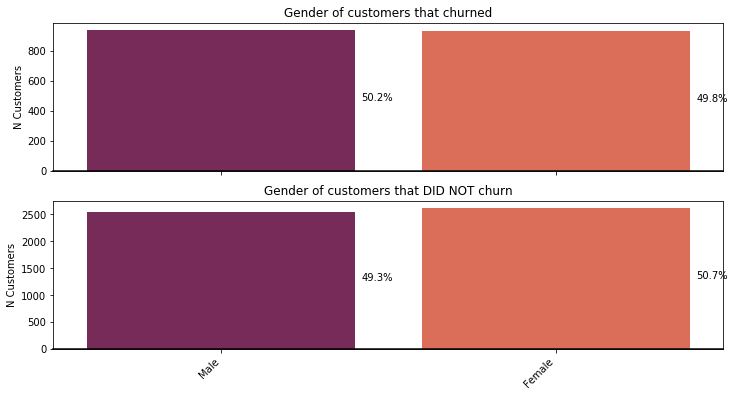

In [72]:
f, (ax, ax1) = plt.subplots(2,figsize=(12, 6),sharex=True)

ax = sns.barplot(x=gender_labels, y=ChurnPerGender, palette="rocket",ax=ax)
ax.axhline(0, color="k", clip_on=False)
ax.set_title('Gender of customers that churned')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel("N Customers")

TotalChurnPerGender = ChurnPerGender[0] + ChurnPerGender[1]
total = TotalChurnPerGender

for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x,y))

ax1 = sns.barplot(x=gender_labels, y=NoChurnPerGender, palette="rocket",ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_title('Gender of customers that DID NOT churn')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_ylabel("N Customers")

TotalNoChurnPerGender = NoChurnPerGender[0] + NoChurnPerGender[1]
total1 = TotalNoChurnPerGender
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))
        
# We can see that the Gender of Customers that Churn and that don't churn is close to a 50/50 distribution.
# Hence, when developing a strategy against churn, focus on gender would not matter. 